In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Read in data
df = pd.read_csv('../../data/wmata.csv', encoding='utf-16', delimiter="\t")

# Print dimensions
print("Before dropping: ", list(df.columns))
print("Before dropping: ", df.shape)

# Remove columns Servicetype_This_Year(group), Holiday_Last_Year, Holiday_This_Year, Servicetype_This_Year, Time_Period, and Date_Last_Year
df = df.drop(['Day_of_Date_This_Year', 'Servicetype_This_Year_(group)', 'Holiday_Last_Year', 'Holiday_This_Year', 'Servicetype_This_Year', 'Time_Period', 'Date_Last_Year', 'Entries_Last_Year'], axis=1)

# Print dimensions
print("After dropping: ", list(df.columns))
print("After dropping: ", df.shape)

# Convert Date_This_Year column to datetime
# Check datatype of Date_This_Year column
print(df['Date_This_Year'].dtype)

# Remove the "No" string from Date_This_Year column
df['Date_This_Year'] = df['Date_This_Year'].str.replace('No', '')

# Convert Date_This_Year column to datetime
df['Date_This_Year'] = pd.to_datetime(df['Date_This_Year'])

# Confirm datatype of Date_This_Year column is datetime
print(df['Date_This_Year'].dtype)

# Rename Date_This_Year column to Date
df = df.rename(columns={'Date_This_Year': 'Date'})

# Rename Entries_This_Year column to Entries
df = df.rename(columns={'Entries_This_Year': 'Entries'})

# Print new df
print(df)


Before dropping:  ['Day_of_Date_This_Year', 'Servicetype_This_Year_(group)', 'Date_This_Year', 'Holiday_Last_Year', 'Holiday_This_Year', 'Servicetype_This_Year', 'Station', 'Time_Period', 'Date_Last_Year', 'Entries_Last_Year', 'Entries_This_Year']
Before dropping:  (15018, 11)
After dropping:  ['Date_This_Year', 'Station', 'Entries_This_Year']
After dropping:  (15018, 3)
object
datetime64[ns]
            Date           Station  Entries
0     2023-03-01     Union Station   4374.0
1     2023-03-01      Metro Center    945.0
2     2023-03-01     Shaw-Howard U    785.0
3     2023-03-01       Spring Hill    138.0
4     2023-03-01      Southern Ave    173.0
...          ...               ...      ...
15013 2023-03-29          Landover     66.0
15014 2023-03-29    New Carrollton    497.0
15015 2023-03-29      Addison Road    130.0
15016 2023-03-29  Morgan Boulevard     92.0
15017 2023-03-29    Downtown Largo    213.0

[15018 rows x 3 columns]


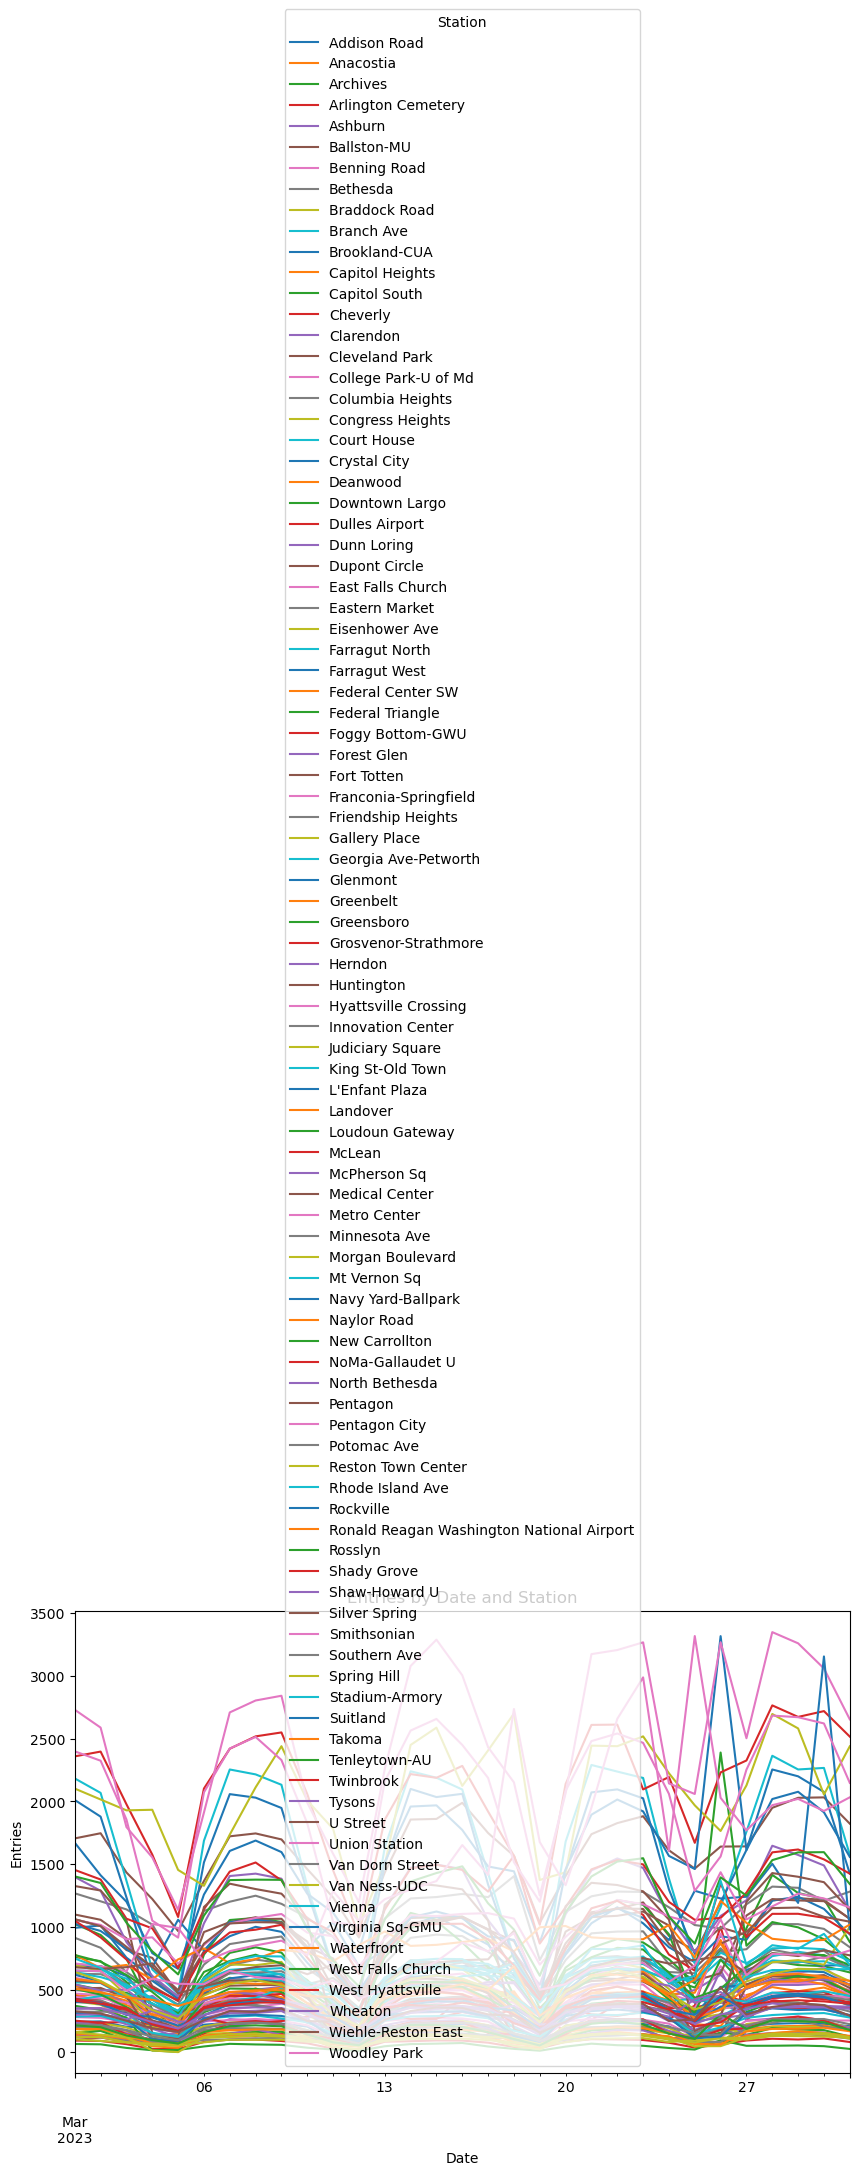

In [67]:
# Build timeseries graph of entries by date and station

pivot_df = df.pivot_table(index='Date', columns='Station', values='Entries')
pivot_df.plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Entries')
plt.title('Entries by Date and Station')
plt.show()


In [82]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# List unique stations
stations = df['Station'].unique()

# Create subplot with one trace per station
fig = make_subplots(rows=1, cols=1)
for s in stations:
    fig.add_trace(
        go.Scatter(x=df[df['Station']==s]['Date'], y=df[df['Station']==s]['Entries'], name=s),
        row=1, col=1
    )

# Create dropdown menu to select station
buttons = []
for s in stations:
    buttons.append(
        dict(method='update', label=s, args=[{'visible': [s==station for station in stations]}])
    )
dropdown = dict(active=0, buttons=buttons, direction='down', showactive=True, x=1.1, y=1.1)

# Update layout to include dropdown menu
fig.update_layout(
    updatemenus=[dropdown], height=600, width=900,
    title='Entries by Date and Station in March 2023', xaxis_title='Date', yaxis_title='Entries',
    yaxis=dict(range=[0, df['Entries'].max()])
)

# Show plot
fig.show()


            Date        Station  Entries
47    2023-03-03  Gallery Place   3135.0
54    2023-03-04  Gallery Place   1856.0
220   2023-03-09  Gallery Place   5487.0
232   2023-03-09  Gallery Place     53.0
338   2023-03-14  Gallery Place   4742.0
...          ...            ...      ...
14623 2023-03-01  Gallery Place   4221.0
14713 2023-03-08  Gallery Place   4433.0
14806 2023-03-15  Gallery Place   4831.0
14895 2023-03-22  Gallery Place   4572.0
14984 2023-03-29  Gallery Place   4688.0

[155 rows x 3 columns]


Text(0.5, 1.0, 'Entries by Date for Gallery Place')

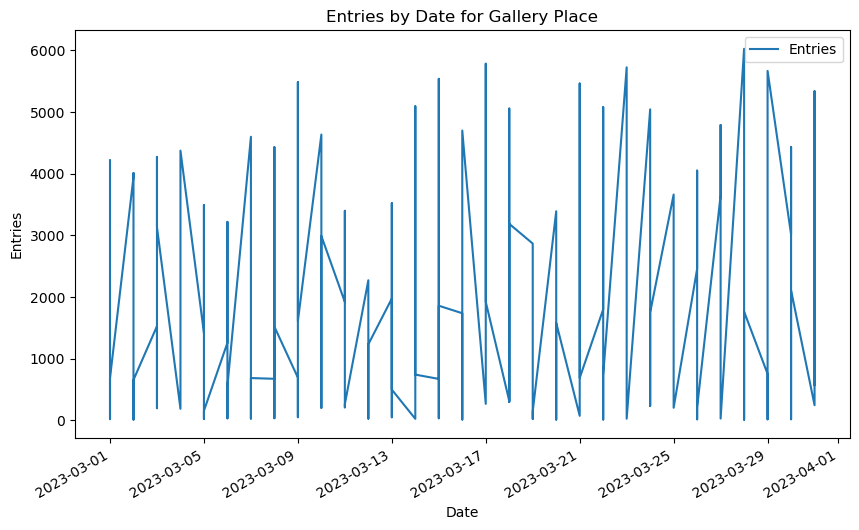

In [70]:
# Plot timeseries graph of entries by date for Union station
# Create a new df with only Gallery Place data
gal_df = df[df['Station'] == 'Gallery Place']

# Print new df
print(gal_df)

# Build timeseries graph of entries by date and station
gal_df.plot(x='Date', y='Entries', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Entries')
plt.title('Entries by Date for Gallery Place')


